Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

reading dataset

In [2]:
missing=["No Info","None","none"]
df=pd.read_csv('CAX_startup_Data.csv',na_values=missing)

In [3]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8.0
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9.0
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0


In [4]:
# shape of the dataset
print("Shape of the dataset is {} rows and {} columns" .format(len(df),len(df.columns)))

Shape of the dataset is 472 rows and 116 columns


Remove Unnecessary Columns

In [5]:
df.isna().sum() / len(df) * 100

Company_Name                 0.000000
Dependent-Company Status     0.000000
year of founding            12.500000
Age of company in years     12.500000
Internet Activity Score     13.771186
                              ...    
Percent_skill_Law           12.923729
Percent_skill_Consulting    12.923729
Percent_skill_Finance       12.923729
Percent_skill_Investment    12.923729
Renown score                12.923729
Length: 116, dtype: float64

In [6]:
# converting  Est. Founding Date and Last Funding Date from object to datetime
df["Est. Founding Date"]=pd.to_datetime(df["Est. Founding Date"])
df["Last Funding Date"]=pd.to_datetime(df["Last Funding Date"])
# converting Last round of funding received (in milionUSD) from object to float
# it is object variable because it consists of a string "unknown amount" in it,so replacing it with nan and converting
# the particular column to float
df["Last round of funding received (in milionUSD)"].replace({"unknown amount":np.nan},inplace=True)
df["Last round of funding received (in milionUSD)"]=df["Last round of funding received (in milionUSD)"].astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_61360\1362541285.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Last round of funding received (in milionUSD)"].replace({"unknown amount":np.nan},inplace=True)


In [7]:
# data types in the data set
dtypes=pd.DataFrame(df.dtypes,columns=["Data Types"])
dtypes

,Data Types
Company_Name,object
Dependent-Company Status,object
year of founding,float64
Age of company in years,float64
Internet Activity Score,float64
...,...
Percent_skill_Law,float64
Percent_skill_Consulting,float64
Percent_skill_Finance,float64
Percent_skill_Investment,float64


In [8]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
Company_Name,0,0.000000
Dependent-Company Status,0,0.000000
year of founding,59,12.500000
Age of company in years,59,12.500000
Internet Activity Score,65,13.771186
Short Description of company profile,149,31.567797
Industry of company,124,26.271186
Focus functions of company,30,6.355932
Investors,140,29.661017
Employee Count,166,35.169492


drop most missing values data

In [9]:
df.drop(['Employees count MoM change', 'Degree from a Tier 1 or Tier 2 university?', 'Top management similarity', 'Employee benefits and salary structures', 'Client Reputation'] , axis=1, inplace=True)

In [10]:
# filling the missing values with nan values in the data set
df=df.fillna(np.nan)

In [11]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8.0
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9.0
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0


In [12]:
describe=df.describe(include =['float', 'int'])
describe.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
year of founding,413.000000,2009.394673,2.607247,1997.000000,2008.000000,2010.000000,2011.000000,2013.000000
Age of company in years,413.000000,4.605327,2.607247,1.000000,3.000000,4.000000,6.000000,17.000000
Internet Activity Score,407.000000,114.159705,225.651419,-725.000000,-3.500000,60.000000,216.000000,1535.000000
Employee Count,306.000000,31.408497,62.673600,0.000000,4.250000,13.000000,31.000000,594.000000
Last Funding Amount,312.000000,6379489.435897,9901621.781409,10000.000000,750000.000000,2800000.000000,7850000.000000,77000000.000000
Number of Investors in Seed,423.000000,1.546099,2.959782,0.000000,0.000000,0.000000,2.000000,24.000000
Number of Investors in Angel and or VC,423.000000,0.576832,1.396723,0.000000,0.000000,0.000000,0.000000,9.000000
Number of Co-founders,472.000000,1.868644,1.143481,0.000000,1.000000,2.000000,2.250000,7.000000
Number of of advisors,472.000000,1.016949,2.014736,0.000000,0.000000,0.000000,1.000000,13.000000
Team size Senior leadership,472.000000,3.730932,2.516539,1.000000,2.000000,3.000000,5.000000,24.000000


In [13]:
df.describe(include=["O"])

,Company_Name,Dependent-Company Status,Short Description of company profile,Industry of company,Focus functions of company,Investors,Has the team size grown,Country of company,Continent of company,Presence of a top angel or venture fund in previous round of investment,...,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Disruptiveness of technology,"Survival through recession, based on existence of the company through recession times",Gartner hype cycle stage,Time to maturity of technology (in years)
count,472,472,323,348,442,332,421,401,401,375,...,387,390,387,389,387,336,390,374,300,300
unique,472,2,313,192,164,319,4,22,4,2,...,2,2,2,2,2,2,3,3,5,4
top,Company1,Success,Big Data Analytics,Analytics,Operations,TechStars,No,United States,North America,No,...,No,No,No,No,Yes,No,Medium,Not Applicable,Plateau,2 to 5
freq,1,305,4,53,31,7,266,305,308,282,...,311,380,329,216,218,285,189,268,85,180


In [14]:
# some of the columns contain multiple values which have same meaning so we have to change those values
df["Has the team size grown"]=df["Has the team size grown"].replace({"yes":"Yes","YES":"Yes"})
df["Cloud or platform based serive/product?"]=df["Cloud or platform based serive/product?"].replace({"cloud":"Cloud"})
df["Local or global player"]=df["Local or global player"].replace({"local  ":"Local","local":"Local","LOCAL":"Local","global":"Global",
                                                                  "GLObaL":"Global","GLOBAL":"Global"})

In [15]:
df

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Company2,Success,2011.0,3.0,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529,21.764706,10.882353,2.941176,0.000000,0.0,0.0,0.0,0.0,8.0
2,Company3,Success,2011.0,3.0,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846154,17.094017,9.401709,0.000000,2.777778,0.0,0.0,0.0,0.0,9.0
3,Company4,Success,2009.0,5.0,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0
4,Company5,Success,2010.0,4.0,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011.0,3.0,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,Company469,Failed,NaN,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
469,Company470,Failed,2010.0,4.0,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,Company471,Failed,2009.0,5.0,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analysis of startups w.r.t founders and co-founders

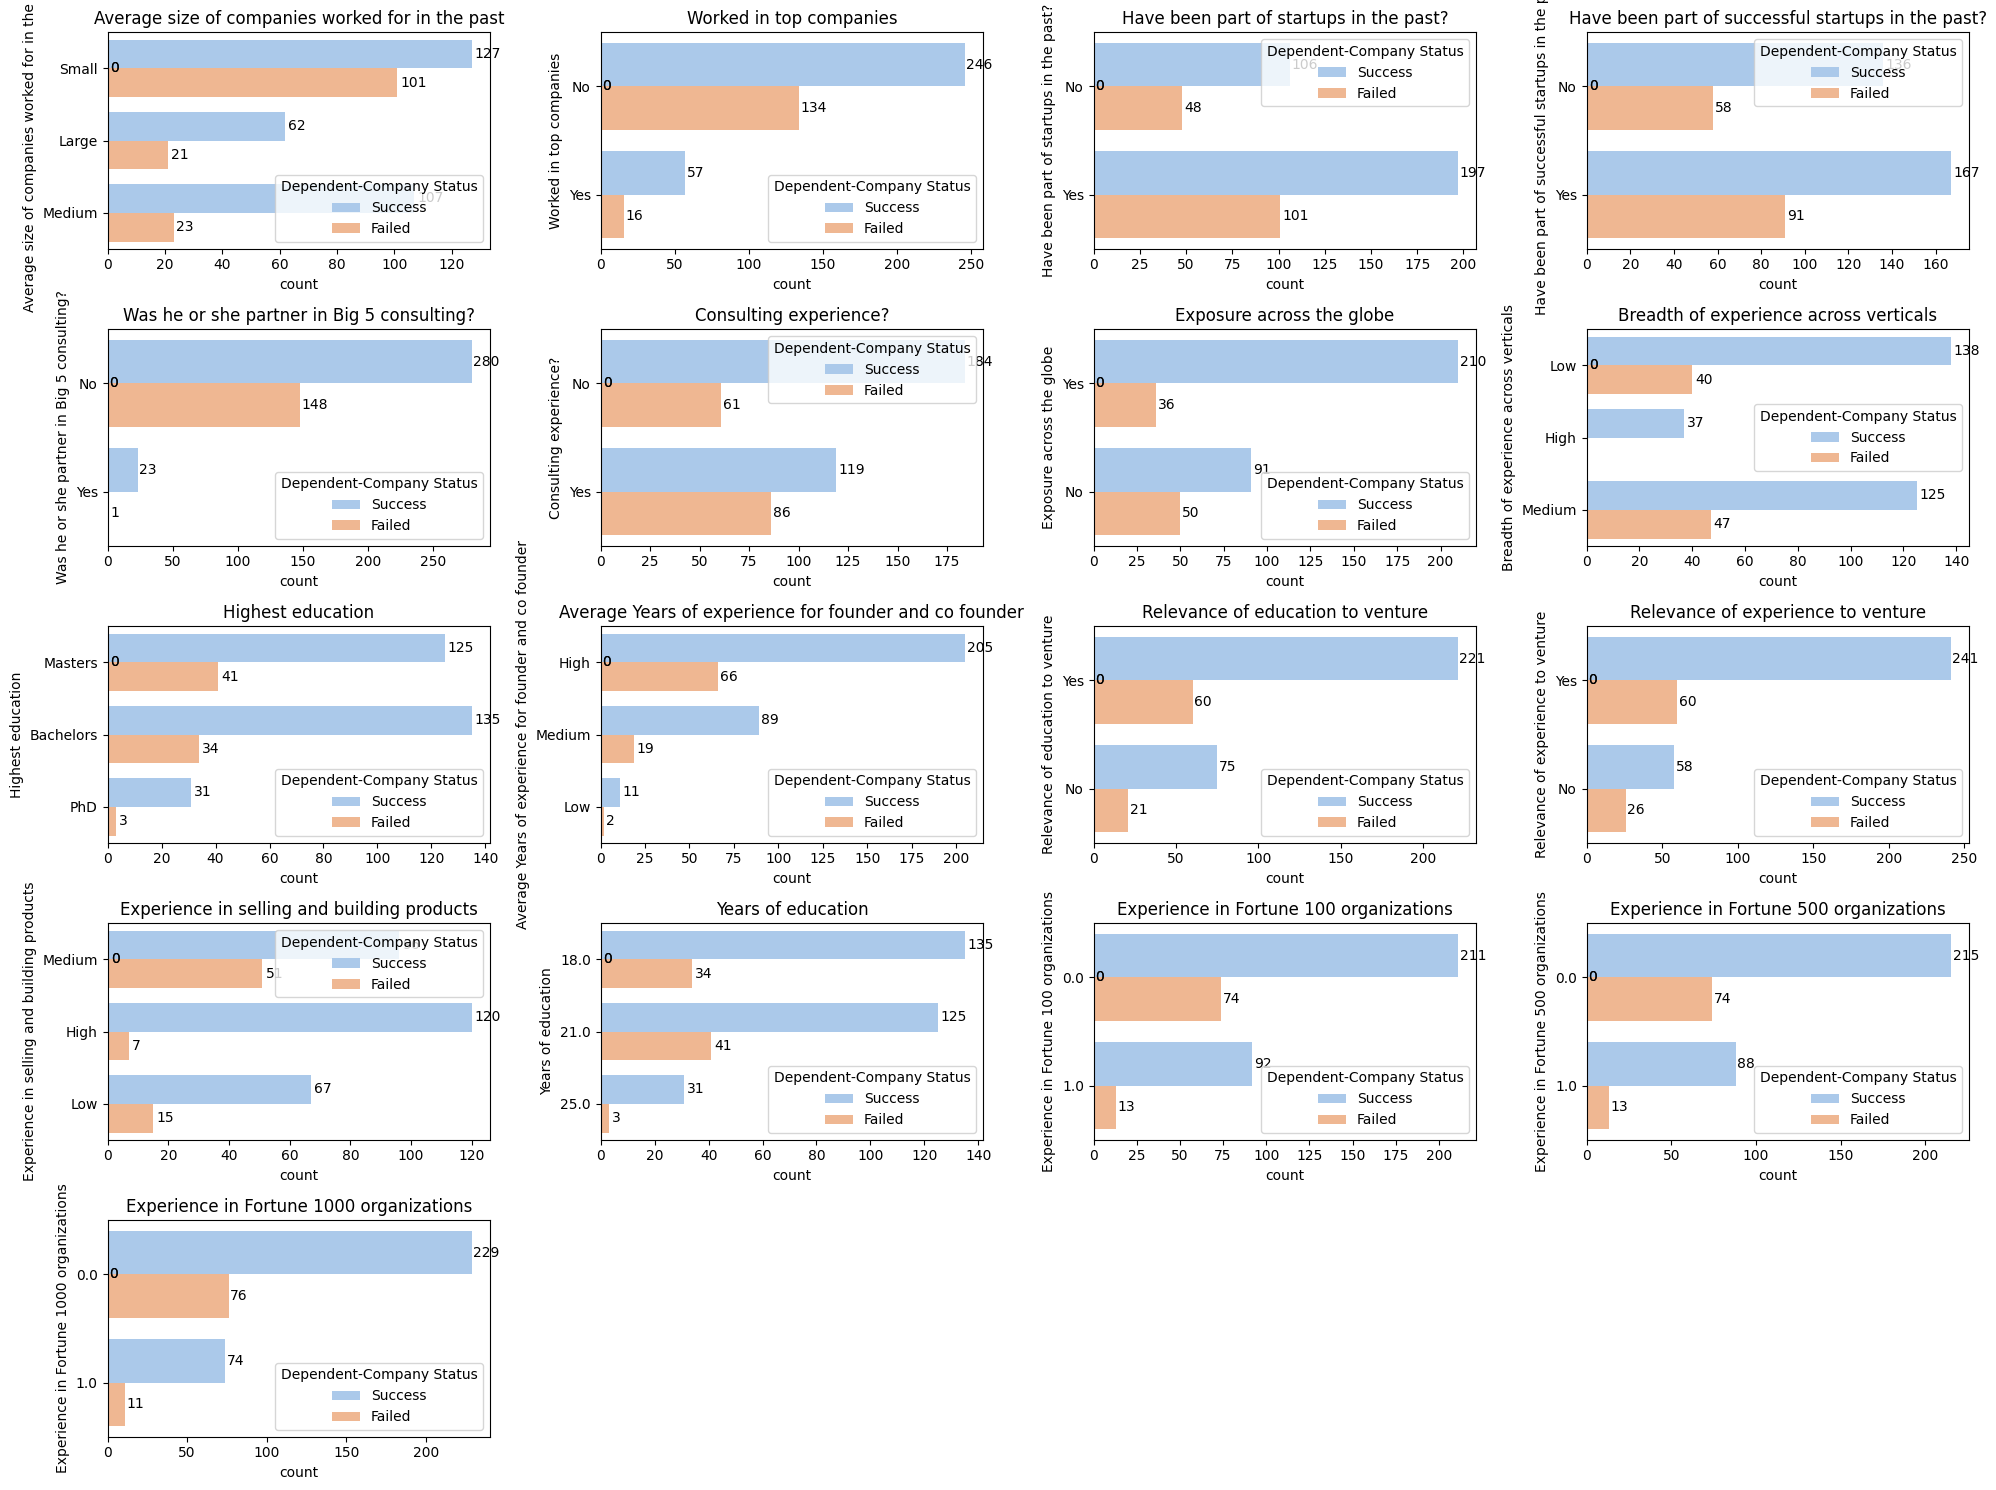

In [16]:
# Columns related to founders and co-founders
cat_columns = [
    "Average size of companies worked for in the past",
    'Worked in top companies',
    "Have been part of startups in the past?", 
    "Have been part of successful startups in the past?",
    "Was he or she partner in Big 5 consulting?", 
    "Consulting experience?", 
    "Exposure across the globe",
    "Breadth of experience across verticals",
    "Highest education",
    'Average Years of experience for founder and co founder',
    "Relevance of education to venture",
    "Relevance of experience to venture",
    "Degree from a Tier 1 or Tier 2 university?",
    "Experience in selling and building products",
    "Top management similarity",
    "Number of Research publications",
    "Years of education",
    "Experience in Fortune 100 organizations",
    "Experience in Fortune 500 organizations",
    "Experience in Fortune 1000 organizations"
]

# Dependent variable (for hue)
dependent_var = 'Dependent-Company Status'

# Ensure all specified columns are in the dataframe
cat_columns = [col for col in cat_columns if col in df.columns]

# Plot the distribution of categorical features
q=1
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_columns, q):
    plt.subplot(5, 4, i)
    ax =sns.countplot(y=col, data=df, palette='pastel', hue=dependent_var)
    plt.title(col)
    plt.tight_layout()
    
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        ax.text(x=width+1,y=p.get_y()+height/2,s=f'{width:.0f}', va='center')

plt.show()



### 1.	Average size of companies worked for in the past:
##### •	Founders from small companies are more likely to fail.
##### •	Large company experience is slightly more associated with success.
### 2.	Worked in top companies:
##### •	Working in top companies shows a higher count of failures, suggesting it might not be a strong indicator of success.
### 3.	Have been part of startups in the past:
##### •	A significant number of founders who have been part of startups in the past tend to succeed.
##### •	Those without startup experience are more likely to fail.
### 4.	Have been part of successful startups in the past:
##### •	Prior experience in successful startups is linked to higher chances of success.
### 5.	Was he or she partner in Big 5 consulting?:
##### •	Partners in Big 5 consulting firms tend to succeed more.
### 6.	Consulting experience?:
##### •	Founders with consulting experience have a higher success rate.
### 7.	Exposure across the globe:
##### •	Global exposure correlates strongly with success.
### 8.	Breadth of experience across verticals:
##### •	Medium breadth of experience is associated with higher success.
### 9.	Highest education:
##### •	Founders with a Master's degree show a higher success rate compared to PhD holders and those with Bachelors.
### 10.	Average Years of experience for founder and co-founder:
##### •	High experience correlates with higher success rates.
### 11.	Relevance of education to venture:
##### •	Relevant education significantly increases the likelihood of success.
### 12.	Relevance of experience to venture:
##### •	Relevant experience also shows a strong correlation with success.
### 13.	Experience in selling and building products:
##### •	Medium experience in selling and building products is linked to higher success.
### 14.	Years of education:
##### •	Founders with 25 years of education show a higher success rate.
### 15.	Experience in Fortune 100 organizations:
##### •	Experience in Fortune 100 organizations is associated with higher success rates.
### 16.	Experience in Fortune 500 organizations:
##### •	Similar to Fortune 100, experience in Fortune 500 organizations is linked to success.
### 17.	Experience in Fortune 1000 organizations:
##### •	Experience in Fortune 1000 organizations shows a higher success rate as well.


C:\Users\DELL\AppData\Local\Temp\ipykernel_61360\352142436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success['Industry of company'] = success['Industry of company'].fillna('').astype(str)


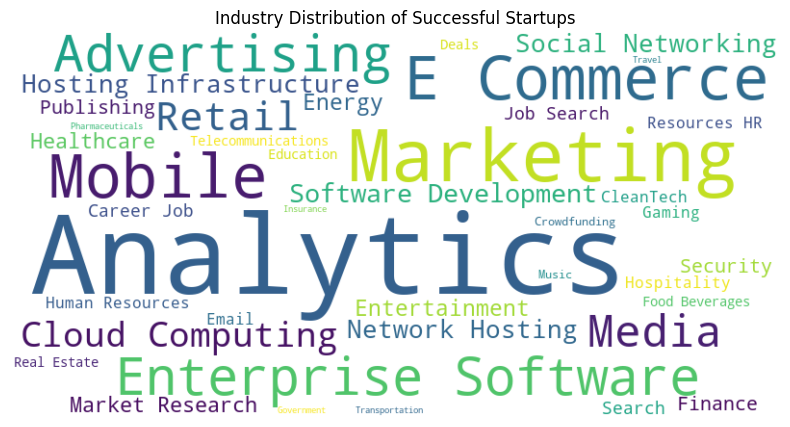

In [17]:
#pip install wordcloud
from wordcloud import WordCloud
# Industry of companies that succeeded
success = df[df['Dependent-Company Status'] == "Success"]
success['Industry of company'] = success['Industry of company'].fillna('').astype(str)
industries = ' '.join(success['Industry of company'])
# Create a word cloud
wordcloud= WordCloud(width=800,height=400,background_color='white',colormap='viridis').generate(industries)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title("Industry Distribution of Successful Startups")
plt.axis('off')
plt.show()

## The word cloud highlights the most frequent industries among successful startups.


### 1.	Top Industries:
#####  •	Analytics
#####  •	Enterprise Software
#####  •	Marketing
#####  •	Mobile
#####  •	E-commerce
### 2.	Significant Industries:
#####  •	Advertising
#####  •	Cloud Computing
#####  •	Social Networking
#####  •	Media
#####  •	Retail
### 3.	Other Notable Industries:
#####  •	Healthcare
#####  •	Network Hosting
#####  •	Software Development
#####  •	Security
#####  •	Market Research
#####  •	Energy


C:\Users\DELL\AppData\Local\Temp\ipykernel_61360\1934671880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail['Industry of company'] = fail['Industry of company'].fillna('').astype(str)


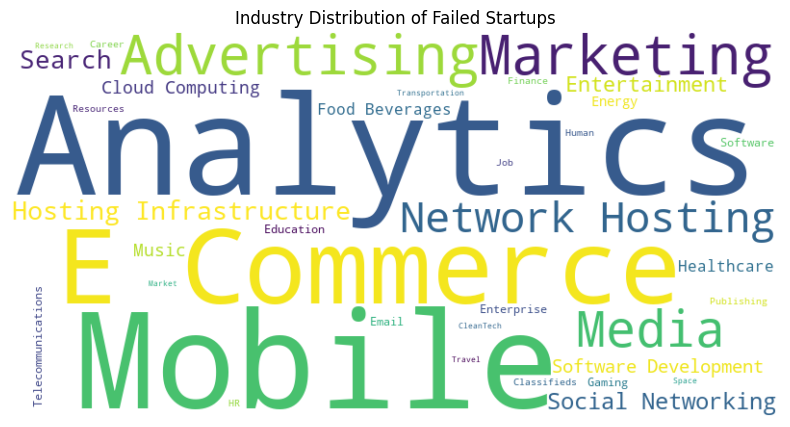

In [18]:
fail = df[df['Dependent-Company Status'] == "Failed"]
fail['Industry of company'] = fail['Industry of company'].fillna('').astype(str)
industries_fail = ' '.join(fail['Industry of company'])

# Create a word cloud
wordcloud_fail = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(industries_fail)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fail, interpolation='bilinear')
plt.title("Industry Distribution of Failed Startups")
plt.axis('off')
plt.show()


## The word cloud highlights the most frequent industries among failed startups. 
### 1.	Top Industries:
#####  •	Mobile
#####  •	Analytics
#####  •	E-commerce
#####  •	Marketing
### 2.	Significant Industries:
#####  •	Advertising
#####  •	Network Hosting
#####  •	Media
#####  •	Cloud Computing
### 3.	Other Notable Industries:
#####  •	Software Development
#####  •	Social Networking
#####  •	Hosting Infrastructure
#####  •	Entertainment


<Figure size 1400x800 with 0 Axes>

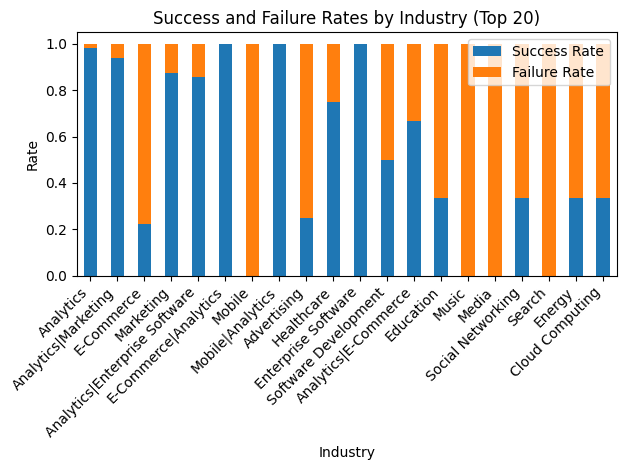

In [19]:
# Group by industry and status
industry_status = df.groupby(['Industry of company', 'Dependent-Company Status']).size().unstack(fill_value=0)

# Calculate success and failure rates
industry_status['Total'] = industry_status.sum(axis=1)
industry_status['Success Rate'] = industry_status['Success'] / industry_status['Total']
industry_status['Failure Rate'] = industry_status['Failed'] / industry_status['Total']

# Sort by total number of startups in each industry
industry_status = industry_status.sort_values(by='Total', ascending=False)

# Limit to top 20 industries
top_industries = industry_status.head(20)

# Plot success and failure rates for top 20 industries
plt.figure(figsize=(14, 8))
top_industries[['Success Rate', 'Failure Rate']].plot(kind='bar', stacked=True)
plt.title('Success and Failure Rates by Industry (Top 20)')
plt.xlabel('Industry')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


Industries with High Success Rates:
 - Analytics, Mobile, Hosting, Enterprise Software, and Healthcare show high success rates, indicating these are more stable and potentially lucrative fields for startups.

Industries with Mixed Results:
- E-Commerce, Advertising, Software Development, Cloud Computing, and Search have a more balanced distribution of success and failure rates, suggesting these are highly 
 competitive industries where the likelihood of failure is significant but success is also possible.
 
Industries with High Failure Rates:
- Music, Media, and Social Networking have high failure rates, suggesting significant challenges and market saturation that makes it difficult for startups to succeed.

## convert float and NAN value into interger all

In [20]:
for column in df.select_dtypes(include=['float']):
    df[column] = df[column].fillna(0).astype(int)
    print(df)

    Company_Name Dependent-Company Status  year of founding  \
0       Company1                  Success                 0   
1       Company2                  Success              2011   
2       Company3                  Success              2011   
3       Company4                  Success              2009   
4       Company5                  Success              2010   
..           ...                      ...               ...   
467   Company468                   Failed              2011   
468   Company469                   Failed                 0   
469   Company470                   Failed              2010   
470   Company471                   Failed              2009   
471   Company472                   Failed              2013   

     Age of company in years  Internet Activity Score  \
0                        NaN                     -1.0   
1                        3.0                    125.0   
2                        3.0                    455.0   
3              

## Related to company status

In [21]:
total_companies = len(df)
print("Total number of companies:", total_companies)

Total number of companies: 472


Text(0, 0.5, 'Company status')

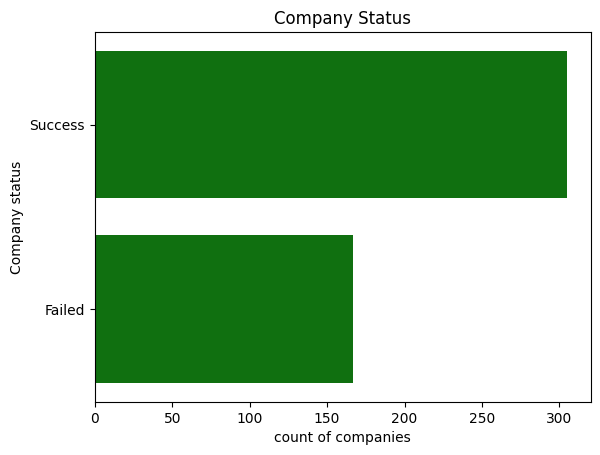

In [22]:
ax=sns.countplot(df["Dependent-Company Status"], color = 'g')
plt.title("Company Status")

plt.xlabel("count of companies")
plt.ylabel("Company status")

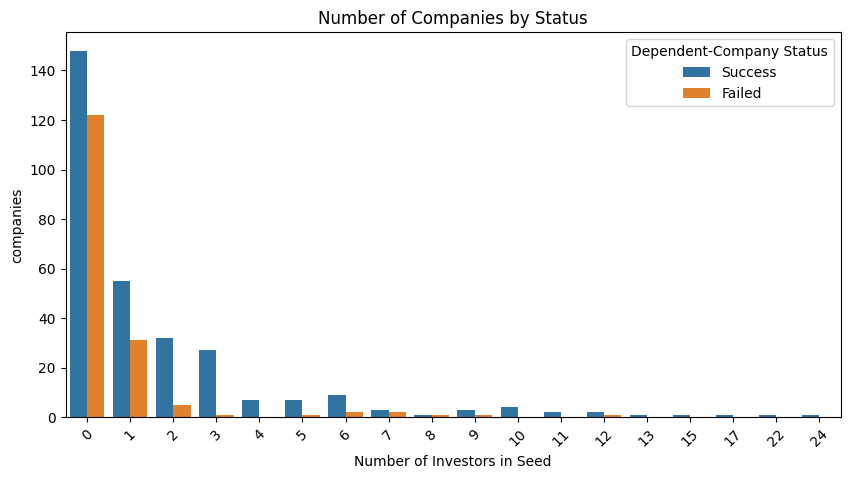

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Number of Investors in Seed', data=df, hue = 'Dependent-Company Status')  
plt.xticks(rotation=45)
plt.ylabel('companies')
plt.title('Number of Companies by Status')
plt.show()

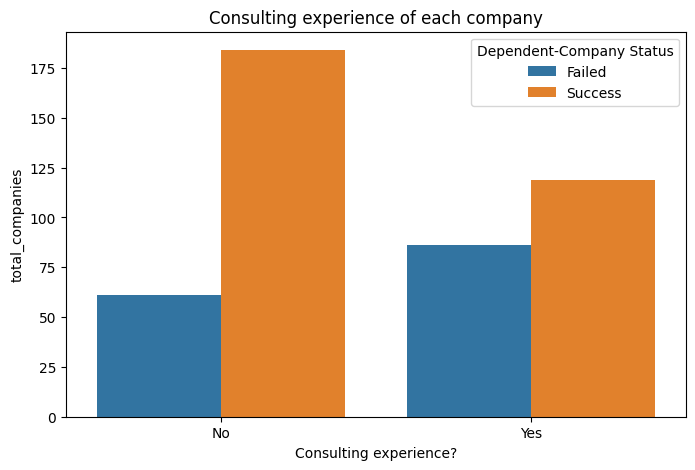

In [24]:
new_data = df.groupby(['Consulting experience?', 'Dependent-Company Status']).size().reset_index(name='total_companies')

plt.figure(figsize=(8, 5))
sns.barplot(data=new_data, x='Consulting experience?', y = 'total_companies' ,hue='Dependent-Company Status')
plt.title("Consulting experience of each company")
plt.show()

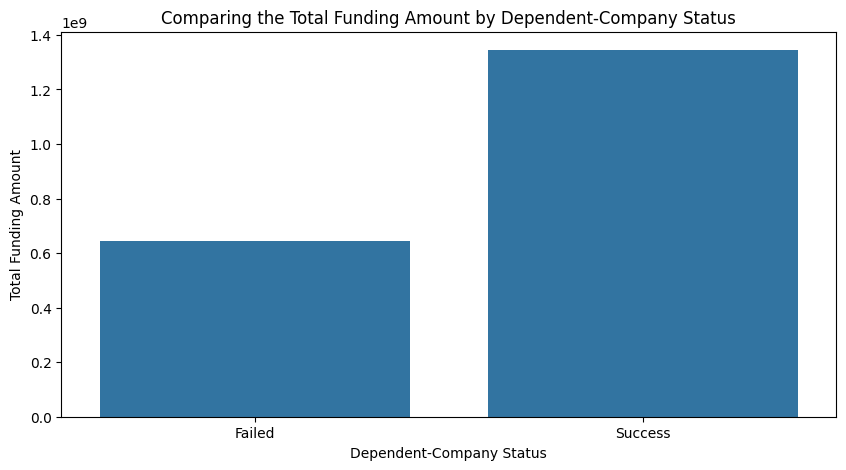

In [25]:

plt.figure(figsize=(10, 5))
new_data = df.groupby('Dependent-Company Status')['Last Funding Amount'].sum().reset_index()
sns.barplot(data=new_data, y='Last Funding Amount', x='Dependent-Company Status')
plt.title("Comparing the Total Funding Amount by Dependent-Company Status")
plt.xlabel("Dependent-Company Status")
plt.ylabel("Total Funding Amount")
plt.show()
#le9 = 1×10^9 = 1000 million

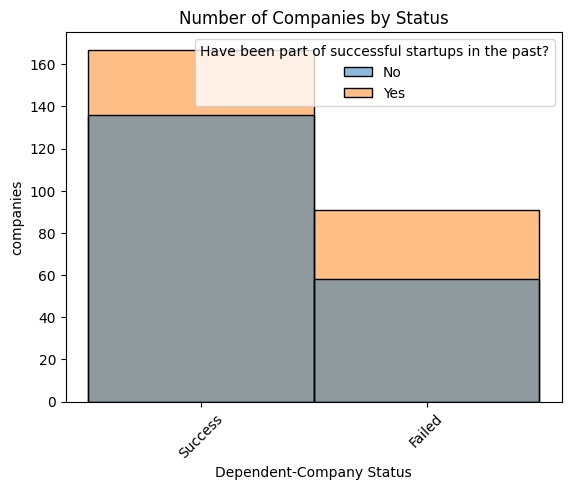

In [26]:
sns.histplot(x='Dependent-Company Status', data=df, hue = 'Have been part of successful startups in the past?')  
plt.xticks(rotation=45)
plt.ylabel('companies')
plt.title('Number of Companies by Status')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_61360\90990084.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Big Data Business', y='Company_Name', data=top_companies, palette='viridis')


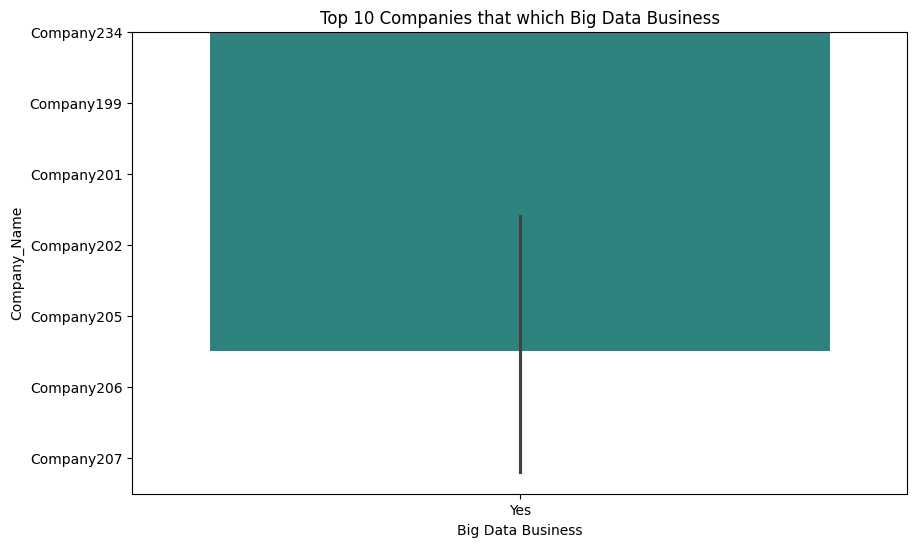

In [27]:
#find which company use Big Data Business
df_sorted = df.sort_values(by='Big Data Business', ascending=False)
top_n = 10
top_companies = df_sorted.head(top_n)

# print(f"\nTop {top_n} companies based on Big Data usage:")
# print(top_companies)

plt.figure(figsize=(10, 6))
sns.barplot(x='Big Data Business', y='Company_Name', data=top_companies, palette='viridis')
plt.xlabel('Big Data Business')
plt.ylabel('Company_Name')
plt.title(f'Top {top_n} Companies that which Big Data Business')
plt.show()

Text(0.5, 1.0, 'Company award based on internet acitivity score')

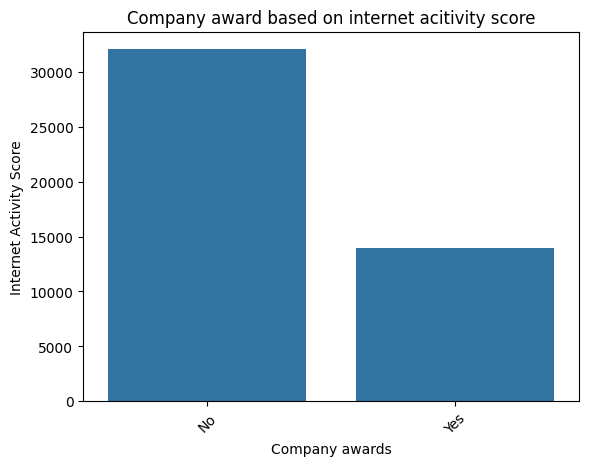

In [28]:

new_data = df.groupby('Company awards')['Internet Activity Score'].sum().reset_index()
sns.barplot(data=new_data, x="Company awards", y="Internet Activity Score")
plt.xticks(rotation=45)
plt.title('Company award based on internet acitivity score')


## infomation related with year

<Axes: title={'center': 'Year of founding'}, xlabel='year of founding', ylabel='Amount of companies'>

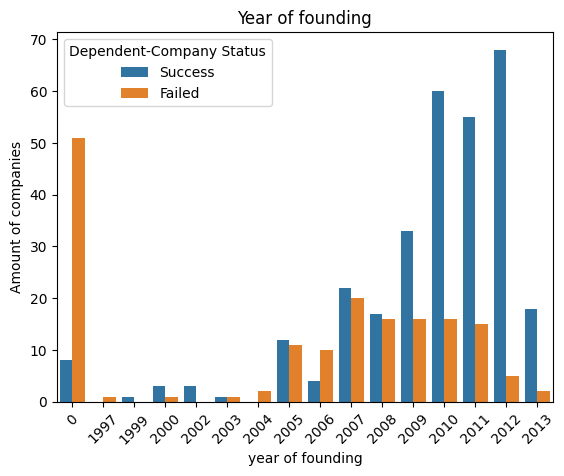

In [29]:
plt.title('Year of founding')
plt.ylabel ('Amount of companies')
plt.xticks(rotation=45)
sns.countplot(data=df, x='year of founding', hue='Dependent-Company Status')


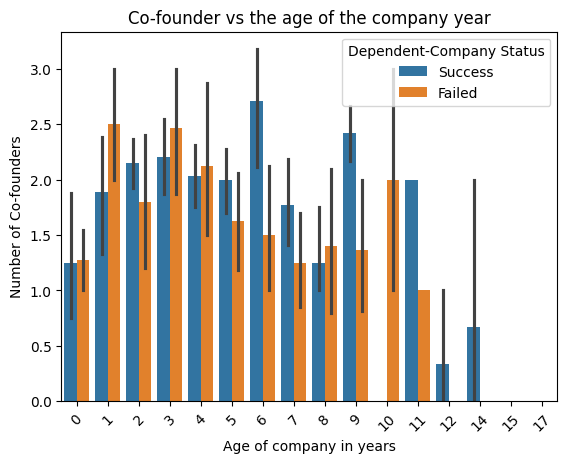

In [30]:

df.sort_values('Age of company in years', inplace = True)
sns.barplot(data=df, x="Age of company in years", y="Number of Co-founders", hue = 'Dependent-Company Status')
plt.xticks(rotation=45)
plt.title('Co-founder vs the age of the company year')

plt.show()

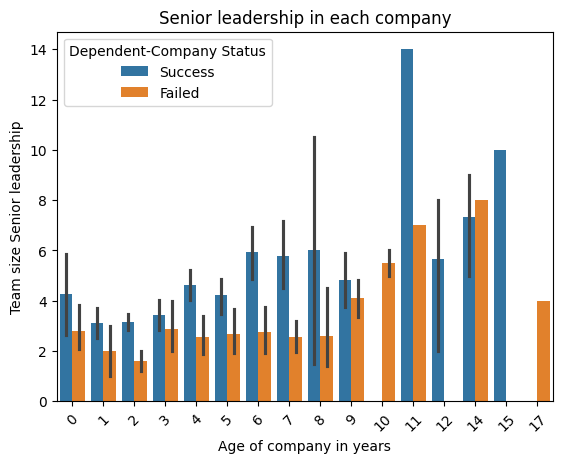

In [31]:
sns.barplot(data=df, x="Age of company in years", y="Team size Senior leadership", hue = 'Dependent-Company Status' )
plt.xticks(rotation=45)
plt.Figure((8,4))
plt.title('Senior leadership in each company')
plt.show()

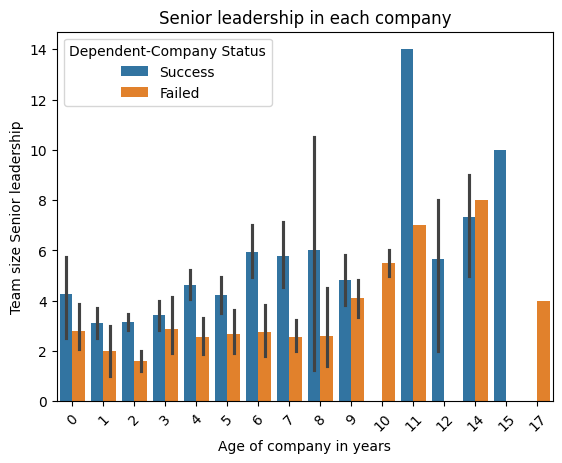

In [32]:
sns.barplot(data=df, x="Age of company in years", y="Team size Senior leadership", hue = 'Dependent-Company Status' )
plt.xticks(rotation=45)
plt.Figure((8,4))
plt.title('Senior leadership in each company')
plt.show()